# Assignment 1 Overview

According to assignment specification, in this assignment, we will develop Python code to classify `Sneakers` versus `Sandals` using the Fashion-MNIST dataset by using logistic regression and k-NN classifiers. We will use Grid Search and cross-validation to find the optimal hyperparameters of the model (e.g., the regularisation hyperparameter) and discuss and interpret the different decisions and their impact on the model’s performance and interpretability.


# Get the Data

"Fashion-MNIST is a dataset motivated by the popular MNIST dataset used to classify handwritten digits. It contains examples of ten classes (e.g. sneakers, coats, sandals, trousers, pullovers, etc.). Fashion-MNIST has a training set with 60,000 examples and a test set with 10,000 examples. Each example is a 28 x 28 low-resolution and grayscale image (similar to the examples in MNIST) associated with a label from one of the ten classes."


## Load the Data


In [1]:
from pathlib import Path
import pandas as pd

train_set = pd.read_csv(Path("FMNIST_training_set.csv"), header=None)
test_set = pd.read_csv(Path("FMNIST_test_set.csv"), header=None)
train_labels = pd.read_csv(Path("FMNIST_training_set_labels.csv"), header=None)
test_labels = pd.read_csv(Path("FMNIST_test_set_labels.csv"), header=None)

## Take a Quick Look at the Data Structure


In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 358.9 MB


In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Filtering out "Sneakers" and "Sandals" Only


In [4]:
SNEAKER = 7
SANDAL = 5


def filter_data(labels, dataset):
    mask = labels.iloc[:, 0].isin([SNEAKER, SANDAL])
    labels_filtered = labels[mask]
    # Replace 5 with 1, replace 7 with 0
    labels_filtered = labels_filtered.iloc[:, 0].replace({5: 1, 7: 0})
    dataset_filtered = dataset[mask]
    return labels_filtered, dataset_filtered


# For the training data
train_labels, train_set = filter_data(
    train_labels, train_set)

# For the test data
test_labels, test_set = filter_data(test_labels, test_set)

## Task D1


In [5]:
# Get the number of intances in the training set and test set
nrows_train_set = len(train_set)
nrows_test_set = len(test_set)
total_instances = nrows_train_set + nrows_test_set
print('The number of intances in the training set:', nrows_train_set)
print('The number of intances in the test set:', nrows_test_set)
print('The total number of instances:', total_instances)

The number of intances in the training set: 11988
The number of intances in the test set: 2000
The total number of instances: 13988


In [6]:
test_labels

8       1
9       0
11      1
12      0
21      1
       ..
9976    1
9986    0
9987    1
9990    1
9999    1
Name: 0, Length: 2000, dtype: int64

In [7]:
test_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,80,77,0,0,0


In [8]:
train_labels

12       1
30       1
36       1
41       0
43       1
        ..
59979    0
59983    1
59992    0
59995    1
59999    1
Name: 0, Length: 11988, dtype: int64

In [9]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,0,0,0,0,0,0,0,0,0,0,...,65,53,45,33,17,0,0,0,0,0
41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Task D2


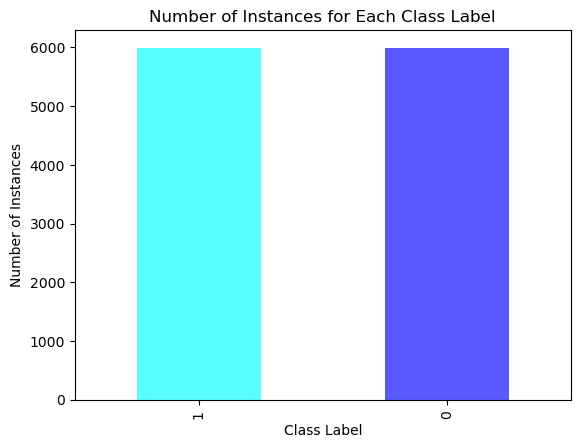

In [10]:
# Provide a bar plot showing the number of instances for each class label
import matplotlib.pyplot as plt

cmap = plt.get_cmap('viridis')

class_counts = train_labels.value_counts()
class_counts.plot(kind='bar', color=['cyan', 'blue'], alpha=0.65)

plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.title('Number of Instances for Each Class Label')

plt.show()

## Task D3